# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because

- A good mix of attributes
  - continuous
  - nominal with small numbers of values
  - nominal with larger numbers of values
- A few missing values

Attribute Information:

- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

---
---

In [1]:
# === Imports === #
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# === Configure pandas to show more rows
pd.options.display.max_rows = 200

---

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

---

### Load the data

In [3]:
# === Download the dataset to local storage === #
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2020-05-08 22:37:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.3’

crx.data.3          100%[===================>]  31.46K  --.-KB/s    in 0.04s   

2020-05-08 22:37:11 (794 KB/s) - ‘crx.data.3’ saved [32218/32218]



In [4]:
# === Download and display data description === #
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names
!cat crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

In [5]:
# === Load data into dataframe === #
# Also found that there is no header
# question marks for null values
# Create column names using loop

cols = []

for a in range(1, 17):
    cols.append(f"A{a}")

credit = pd.read_csv("crx.data", header=None, names=cols, na_values="?")
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


---

### Validate the Number of observations

Validate that the loaded data has the appropriate number of observations. You can check the raw file and read the dataset description from UCI.

According to `crx.names`, there should be 690 rows and 16 columns (15 columns + 1 class attribute).

In [6]:
credit.shape

(690, 16)

---

### Account for Missing Data

UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as NaN.

 According to `crx.names`, there should be missing data as follows:
 
   - 37 cases (5%) have one or more missing values
  - The missing values from particular attributes are:
    - A1:  12
    - A2:  12
    - A4:   6
    - A5:   6
    - A6:   9
    - A7:   9
    - A14: 13

In [7]:
# === Look at data to find missing value indicator === #
!head -n 100 crx.data

b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4,u,g,m,v,2.5,t,f,0,t,g,00360,0,+
b,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,00164,31285,+
a,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,00080,1349,+
b,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,00180,314,+
b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
b,22.08,0.83,u,g,c,h,2.165,f,f,0,t,g,00128,0,+
b,29.92,1.835,u,g,c,h,4.335,t,f,0,f,g,00260,200,+
a,38.25,6,u,g,k,v,1,t,f,0,t,g,00000,0,+
b,48.08,6.04,u,g,k,v,0.04,f,f,0,f,g,00000,2690,+
a,45.83,10.5,u,g,q,v,5,t,t,07,t,g,00000,0,+
b,36.67,4.415,y,p,k,v,0.25,t,t,10,t,g,00320,0,+
b,28.25,0.875,u,g,m,v,0.96,t,t,03,t,g,00396,0,+
a,23.25,5.875,u,g,q,v,3.17,t,t,10,f,g,00120,245,+
b,21.83,0.25,u,g,d,h,0.665,t,f,0,t,g,00000,0,+
a,19.17,8.585,u,g,cc,h,0.75,t,t,07,f,g,00096,0,+
b,25.00,11.25,u,g,c,v,2.5,t,t,17,f,g,00200,1208,+
b,23

### Null values

Based on a look at the first 100 lines of the file, I can see that the null values are represented by question marks `?`.

In [8]:
# === Check null value counts === #
credit.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# === Fill in na values === #
credit["A1"] = credit["A1"].fillna(method="ffill")
credit["A2"] = credit["A2"].fillna(value=credit["A2"].mean())
credit["A4"] = credit["A4"].fillna(method="ffill")
credit["A5"] = credit["A5"].fillna(method="ffill")
credit["A6"] = credit["A6"].fillna(method="ffill")
credit["A7"] = credit["A7"].fillna(method="ffill")
credit["A14"] = credit["A14"].fillna(value=credit["A14"].mean())


In [10]:
# === Confirm it worked === #
credit.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

---

### Validate Column Datatypes

Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

Attribute Information:

    A1: b, a.
    A2: continuous.
    A3: continuous.
    A4: u, y, l, t.
    A5: g, p, gg.
    A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7: v, h, bb, j, n, z, dd, ff, o.
    A8: continuous.
    A9: t, f.
    A10: t, f.
    A11: continuous.
    A12: t, f.
    A13: g, p, s.
    A14: continuous.
    A15: continuous.
    A16: +,- (class attribute)



In [11]:
# === Compare datatypes === #
credit.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [12]:
# === Convert target to binary int === #
replace = {
    "+": 1,
    "-": 0,
}
credit["A16"] = credit["A16"].replace(to_replace=replace)
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


---
---

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables.

> In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

#### Continuous Features

For the 6 continuous features, how are they different when split between the two class labels? 

Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

#### Categorical Features

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

> "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

#### Notes

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

---

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables.

> In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

In [13]:
# === Look at data again === #
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


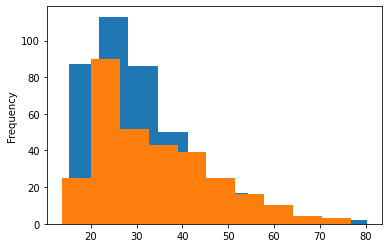

In [14]:
# === Plot grouped to get a sense of group distributions === #

# This one seems to one of the less extreme cases
credit.groupby(by="A16")["A2"].plot.hist();

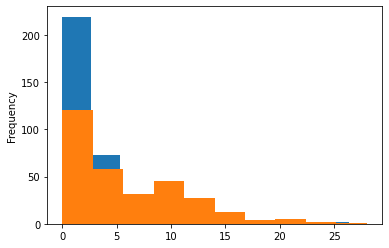

In [15]:
credit.groupby(by="A16")["A3"].plot.hist();

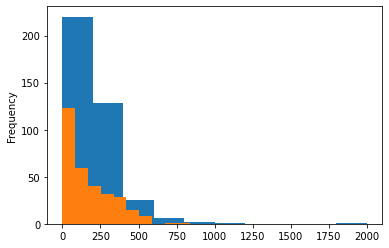

In [16]:
# === One of the more extreme ones === #
credit.groupby(by="A16")["A14"].plot.hist();

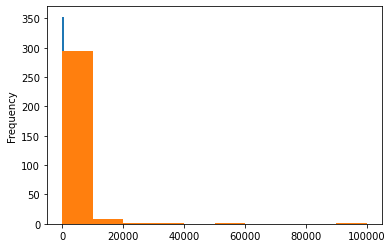

In [17]:
# === Seems to be another relatively extreme case === #
credit.groupby(by="A16")["A15"].plot.hist();

---

#### Continuous Features

For the 6 continuous features, how are they different when split between the two class labels? 

Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

Based on the above explorations:

* More extreme: A14
* Less extreme: A2

In [0]:
# === Filter dataframe for two groups === #
group_0 = credit[credit["A16"] == 0]
group_1 = credit[credit["A16"] == 1]

#### Test it out

When the variables A* are separated into two groups based on the value of the target, A16:

1. Null Hypothesis: the value of A* does not vary between the two groups
2. Alternative Hypothesis: the mean value of A* is different between the two groups
3. Confidence level: 95%

In [21]:
# === Perform t-test on A14 === #
stats.ttest_ind(group_0["A14"], group_1["A14"])

Ttest_indResult(statistic=2.635453311174974, pvalue=0.008591788512202131)

Due to a p-value of 0.008, I reject the null hypothesis that the two groups are the same.

In [22]:
# === Perform t-test on A2
stats.ttest_ind(group_0["A2"], group_1["A2"])

Ttest_indResult(statistic=-4.295929647669026, pvalue=1.9902200656148825e-05)

Due to a p-value of 0.0000019, I reject the null hypothesis that the two froups are the frame.

---

#### Categorical Features

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

> "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

In [23]:
credit.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1


In [32]:
# === A1 === #
ct_a1 = pd.crosstab(credit["A1"], credit["A16"])
# Not very significant of a difference when looking at the table,
# what about when running a chi^2?
chi_squared, p_value, dof, expected = stats.chi2_contingency(ct_a1)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi-Squared: 0.5037254160868209
P-value: 0.47786776443128076
Degrees of Freedom: 1
Expected: 
 [[118.78550725  95.21449275]
 [264.21449275 211.78550725]]


> In the case of A1, I fail to reject the null hypothesis that A1 is independent of A16.  
I cannot therefore conclude that there is any relationship between A1 and A16.

In [28]:
# === A6 === #
pd.crosstab(credit["A6"], credit["A16"])

A16,0,1
A6,,
aa,35,19
c,75,64
cc,12,29
d,23,7
e,11,14
ff,46,7
i,47,14
j,7,3
k,38,14


In [36]:
# === A9 === #
ct_a9 = pd.crosstab(credit["A9"], credit["A16"])

chi_squared, p_value, dof, expected = stats.chi2_contingency(ct_a9)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[182.61884058 146.38115942]
 [200.38115942 160.61884058]]


> Due to a p-value of basically 0, I reject the null hypothesis that A9 and A16 are independent.  
I can therefore conclude that there is a relationship between them.

---
---

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

---

*My words below!*

---

### Interpret and explain the two t-tests you ran

What do they tell you about the relationships between the continuous features you selected and the class labels?

### Interpret and explain the two $\chi^2$ tests you ran

What do they tell you about the relationships between the categorical features you selected and the class labels?

### What was the most challenging part of this sprint challenge?

---
---

## Stretch Goals

Please do not work on anything listed in this section until you have adequately answered everything in the above three sections, all of these stretch goals are **OPTIONAL** but completing them will ensure you a score of 3 on the corresponding sections.

### Section 1 Stretch Goal: (do the following)
- Go above and beyond in conducting thorough data exploration including high quality comments and/or markdown text cells to explain your process/discoveries.

### Section 2 Stretch Goals: (do one of the following)
 - Write a function(s) to automate the execution of t-tests on the continuous variables treating the different class labels as the two samples.

 - Write a funciton(s) to automate the execution of chi^2 tests on all of the different combinations of categorical variables in the dataset.

### Section 3 Stretch Goals: (do one of the following)
- Construct a confidence interval around the mean of one of the continuous variables, communicate the results/interpretation of that confidence interval in the most consumable/easy-to-understand way that you can. (You may choose to include a graph here, but you don't necessarily have to) Communicate the precision of your estimate as clearly as possible.

- Explain the relationship between confidence intervals and T-tests, if possible, use code to demonstrate some important aspects of te